In [1]:
import importer
import numpy as np
import fitness as ftn
import matrix_blending as mxb
import dna
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera

importing Jupyter notebook from fitness.ipynb
importing Jupyter notebook from dna.ipynb
importing Jupyter notebook from vertices_processor.ipynb
importing Jupyter notebook from triangle_renderization.ipynb
importing Jupyter notebook from matrix_blending.ipynb


In [2]:


    
def getPopulationDnaFitnesses(populationDna,controlImg):
    
    (m,n,l) = populationDna.shape
    fitnesses = []
    for k in range(l):
        currentIndividualDna  = populationDna[:,:,k]
        currentFitness = ftn.fitness(controlImg,currentIndividualDna)
        fitnesses.append(currentFitness)
    
    return fitnesses
    
def orderPopulationDnaByFitness(populationDna,controlImg):
    
    fitnesses = getPopulationDnaFitnesses(populationDna,controlImg)
    
    orderIdx = np.argsort(fitnesses)
    
    (m,n) = populationDna[:,:,0].shape
    
    orderedPopulationDna = np.zeros((m,n))
    orderedFitnesses = []
    
    for idx in orderIdx:
        orderedPopulationDna = np.dstack((orderedPopulationDna,populationDna[:,:,idx]))
        orderedFitnesses.append(fitnesses[idx])
        
    return (orderedFitnesses, orderedPopulationDna[:,:,1:])



<IPython.core.display.Javascript object>


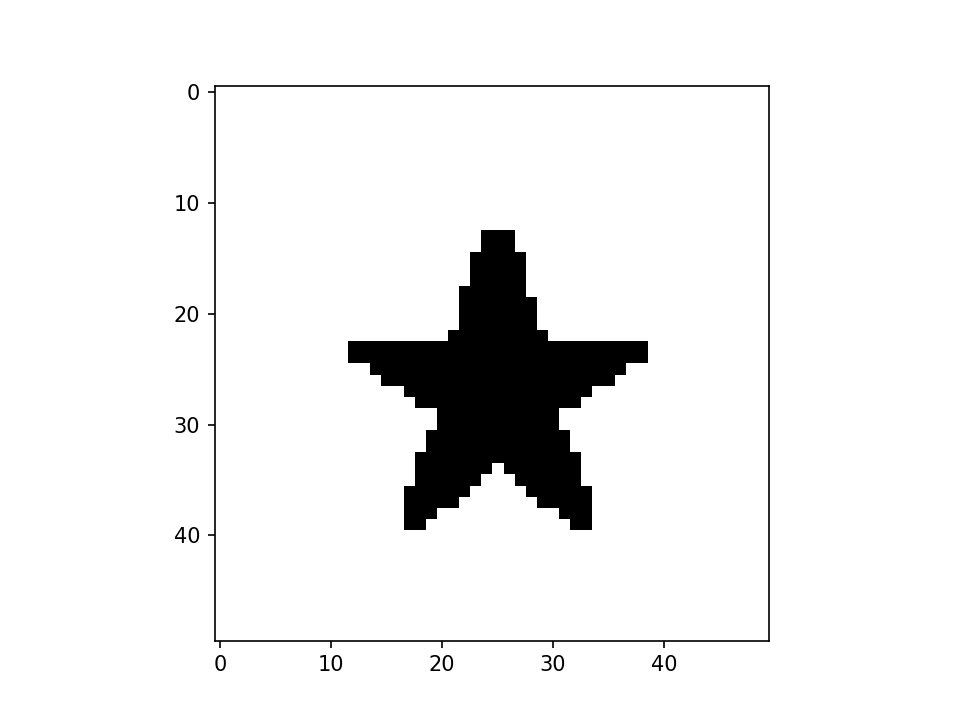

<IPython.core.display.Javascript object>


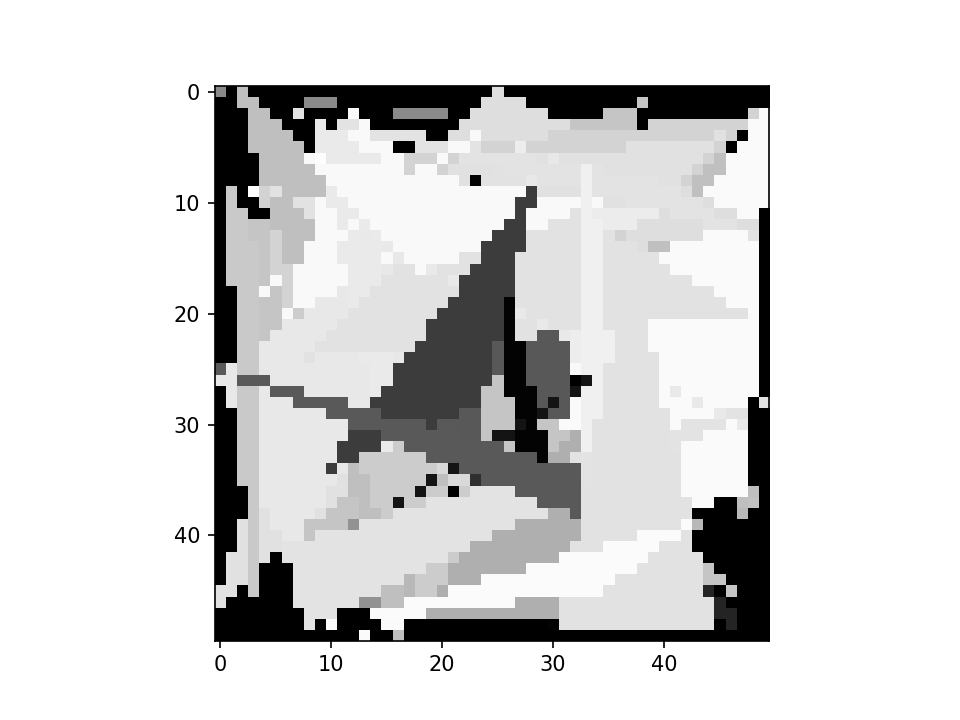

triangle_renderization.ipynb:26: RuntimeWarning: divide by zero encountered in long_scalars
  "    else:\n",
triangle_renderization.ipynb:26: RuntimeWarning: invalid value encountered in long_scalars
  "    else:\n",
triangle_renderization.ipynb:61: RuntimeWarning: divide by zero encountered in long_scalars
  "        \n",
triangle_renderization.ipynb:27: RuntimeWarning: divide by zero encountered in long_scalars
  "        M[y,x2:x1+1] = fill\n",
triangle_renderization.ipynb:60: RuntimeWarning: divide by zero encountered in long_scalars
  "        curx2 = curx2+invSlope2;\n",
triangle_renderization.ipynb:61: RuntimeWarning: invalid value encountered in long_scalars
  "        \n",


In [4]:
%matplotlib nbagg


stringPath = 'sample_star2.png'
controlImg = ftn.getGrayImage(stringPath)
mxb.displayImg(controlImg)
(m,n) = controlImg.shape
popSize = 10
DNA = np.zeros((m,n))

bestFitness = ftn.fitness(controlImg,DNA)

fig = plt.figure()



myimages = []

for k in range(900):
    randomPop = dna.generateRandomPop(popSize,m,n)
    populationDna = dna.mergePopulationOnDna(DNA,randomPop,m,n)
    (orderedFitnesses, orderedPopulationDna) = orderPopulationDnaByFitness(populationDna,controlImg)
    
    if bestFitness > orderedFitnesses[0]:
        bestFitness = orderedFitnesses[0]
        DNA = orderedPopulationDna[:,:,0]
#         plt.imshow(DNA)
        implot = mxb.displayImg(DNA, show=False)
        myimages.append([implot])

my_anim = animation.ArtistAnimation(fig, myimages, interval=5, blit=True, repeat_delay=1000)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
my_anim.save('sample_star2_GA.mp4', writer=writer)
# my_anim.animate()
plt.show()


In [11]:
DNAcopy = DNA

mxb.displayImg(DNAcopy)

In [13]:
myimages

[[<matplotlib.image.AxesImage at 0x108799f10>],